<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [59]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
import math
from sklearn.model_selection import train_test_split

In [60]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [61]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
X_train_final,X_cv,y_train_final,y_cv = train_test_split(X_train,y_train,test_size = 0.25,random_state = 0)
#train the algorithm
print("Shape of the X_train:{0} and Y_train:{1}".format(X_train_final.shape,y_train_final.shape))
print("Shape of the X_test : {0} and y_test : {1}".format(X_test.shape,y_test.shape))
print("Shape of the Validation :{0} and Y_cv : {1}".format(X_cv.shape,y_cv.shape))
support_vector_classifier = SVC(gamma = 0.001,C = 100)
support_vector_classifier.fit(X_train_final,y_train_final)


Shape of the X_train:(3000, 5) and Y_train:(3000,)
Shape of the X_test : (1000, 5) and y_test : (1000,)
Shape of the Validation :(1000, 5) and Y_cv : (1000,)


SVC(C=100, gamma=0.001)

In [62]:
class SupportVectorClassifier:
    
    def __init__(self,gamma = 0.001,C = 100):
        
        self.gamma = gamma
        self.C = C
    
    def fit(self,X_train,y_train):
        
        model = SVC(gamma = self.gamma,C = self.C).fit(X_train,y_train)
        return model
    
    def compute_similarity_matrix(self,xi,xq,gamma):
    
        norm = np.sum(( xi - xq) ** 2 ,axis = -1)

        similarity_function  = np.exp(- (gamma) * norm)

        return similarity_function
    
    def kernal_gram_matrix(self,Xi,Xj,gamma):
        kernal_matrix_similarity = np.zeros((Xi.shape[0],Xj.shape[0])) 
        for idx,row in enumerate(Xi):
            for idx_col,column in enumerate(Xj):
                rbf_kernal = self.compute_similarity_matrix(row,column,self.gamma)
                kernal_matrix_similarity[idx][idx_col] = rbf_kernal
        return kernal_matrix_similarity
        
    def decision_function(self,XCV,support_vectors,dual_coeff,intercept):
    
        #compute the kernal similarity Matrix
        kernal_gram_matixes= self.kernal_gram_matrix(XCV, support_vectors,self.gamma)

        #yi* alpha i * kernal(xi,xq)
        decision_fun = dual_coeff * kernal_gram_matixes
        decision_custom = np.sum(decision_fun,axis = -1) + intercept

        return decision_custom.reshape(-1,1)

In [63]:
svc = SupportVectorClassifier(gamma = 0.001,C = 100)
support_vector_classifier = svc.fit(X_train_final,y_train_final)
#intercept b
intercept = support_vector_classifier.intercept_

#dual_coefficient yi*alphai

svm_dual_coeff_ = support_vector_classifier.dual_coef_

#get the support_vector
support_vector = support_vector_classifier.support_vectors_

f_cv = svc.decision_function(X_cv,support_vector,svm_dual_coeff_,intercept)

In [64]:
sk_df = support_vector_classifier.decision_function(X_cv)
sk_df = sk_df.reshape(-1,1)

In [65]:
#check the difference between the custom predction and actual predictiom
difference = f_cv - sk_df
differece_error = [i  for i in range(len(difference)) if difference[i] > 1e-10]
print(differece_error)

[]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__

In [66]:
#implemented Calibrated CV

#input actual_y -> function(x)-> ycv
#construct a data set

def label_count(Y):
    positive_label,negative_label = 0,0
    for label in range(len(Y)):
        if Y[label] == 1:
            positive_label += 1
        else:
            negative_label +=1
    assert((positive_label +negative_label) == len(Y) )
    return positive_label,negative_label
no_of_positive_point,no_of_negative_point = label_count(y_train_final)
print("Positive Label : {0} and Negative Label : {1}".format(no_of_positive_point,no_of_negative_point))
y_positive,y_negative = (no_of_positive_point + 1) / (no_of_positive_point + 2), 1 / (no_of_negative_point + 2)
print("Calibrated positive point:{0} and Calibrated Negative Point : {1}".format(y_positive,y_negative))

Positive Label : 906 and Negative Label : 2094
Calibrated positive point:0.998898678414097 and Calibrated Negative Point : 0.00047709923664122136


In [67]:
#In platt Scaling We build a new validation dataset- create a bucket and computing the averagefrom our case have no of points in low we directly apply y_avg
def average_y(Y,y_positive,y_negative):
    
    y_bucket = []
    for label in range(len(Y)):
        if Y[label] == 1:
            y_bucket.append(y_positive)
        else:
            y_bucket.append(y_negative)
    return y_bucket
y_cv_modified = average_y(y_cv,y_positive,y_negative)

In [68]:
class SGD:
    def __init__(self,learning_rate,epochs):
        
        self.learning_rate = learning_rate 
        self.epochs = epochs 
    
    def sigmoid(self,z):
        sigmoid_of_Z= 1 / (1 + np.exp(-z))
        return sigmoid_of_Z
    
    def gradient(self,x,y,w,b,alpha,N):
        dw = ((x * ((y - self.sigmoid(np.dot(w,x) + b))) - ((alpha / N) * w)))
        db = y - self.sigmoid(np.dot(w,x) + b)
        return dw,db
    def logloss(self,y_true,y_pred):
        
        loss = 0
        n = len(y_true)
        if(len(y_true) == len(y_pred)):
            for l in range(len(y_true)):

                loss += (y_true[l] * math.log10(y_pred[l])) + ((1-y_true[l]) * math.log10(1-y_pred[l]))

            loss = (-1 / n) * loss 

        return loss

    def fit(self,X,Y,alpha):
        
        loss_list = []
        wait = 0
        #initialize weight
        w = 0
        b = 0
        print(self.learning_rate)
        for epoch in range(1,epochs+1):
            
            for data in range(len(X)):      
                #compute gradient
                dw,db= self.gradient(X[data],Y[data],w,b,alpha,len(X))
                #update weight 
                w = w +  self.learning_rate * dw
                #update bias
                b = b +  self.learning_rate * db
            y_pred  = [self.sigmoid(np.dot(w,X[data]) + b) for data in range(len(X))]
            loss = self.logloss(Y,np.array(y_pred))
            
            loss_list.append(loss)
            if epoch >= 2:
                if loss_list[epoch-2]  == loss_list[epoch-1]:
                    print("No improvement in training")
                    break
                     
            print('Epoch--{0}'.format(epoch) )

            print("Training Loss  : {0} ".format(loss[0]))

        return loss_list,w,b
    def predict(self,x,w,b):
        z = np.dot(w,x) + b
        return self.sigmoid(z)
        


In [69]:
learning_rate = 1e-4
epochs = 100
alpha=0.0001
y_cv_modified = np.array(y_cv_modified).reshape(-1,1)
sgd = SGD(learning_rate,epochs)


In [70]:
loss_list,w,b= sgd.fit(f_cv,y_cv_modified,alpha)
print("Optimized W:{0} and b:{1}".format(w,b))

0.0001
Epoch--1
Training Loss  : 0.2623439039314991 
Epoch--2
Training Loss  : 0.23328949504531726 
Epoch--3
Training Loss  : 0.21112989001987448 
Epoch--4
Training Loss  : 0.19390095342750988 
Epoch--5
Training Loss  : 0.1802395179581706 
Epoch--6
Training Loss  : 0.16920443188047013 
Epoch--7
Training Loss  : 0.16014004963550305 
Epoch--8
Training Loss  : 0.15258251814728516 
Epoch--9
Training Loss  : 0.14619776722588454 
Epoch--10
Training Loss  : 0.14074077868139112 
Epoch--11
Training Loss  : 0.13602866186090992 
Epoch--12
Training Loss  : 0.1319226272846691 
Epoch--13
Training Loss  : 0.12831572881244926 
Epoch--14
Training Loss  : 0.12512439016558863 
Epoch--15
Training Loss  : 0.12228245064105836 
Epoch--16
Training Loss  : 0.11973691421734095 
Epoch--17
Training Loss  : 0.11744486869036001 
Epoch--18
Training Loss  : 0.11537122090892515 
Epoch--19
Training Loss  : 0.1134870096789125 
Epoch--20
Training Loss  : 0.11176813331551005 
Epoch--21
Training Loss  : 0.11019437877586269

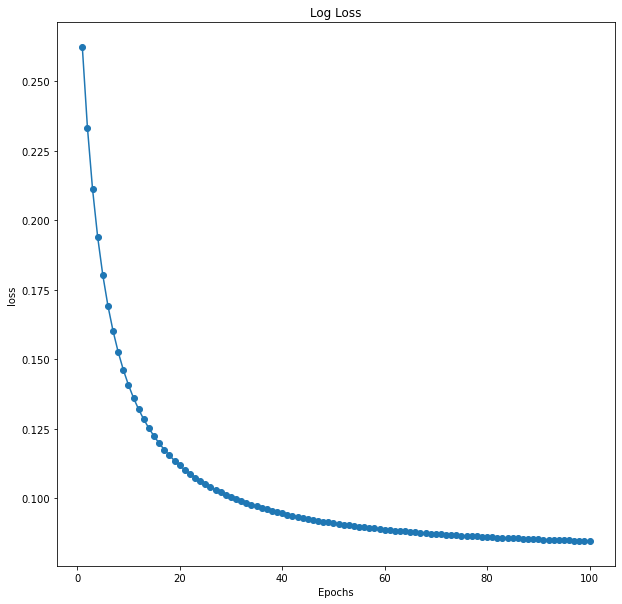

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(range(1,epochs + 1),loss_list)
plt.scatter(range(1,epochs+1),loss_list)
plt.title("Log Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

In [72]:
#test Data 
ftest = svc.decision_function(X_test,support_vector,svm_dual_coeff_,intercept)
test_prediction  = [sgd.predict(ftest[data],w[0],b[0])[0] for data in range(len(ftest))]

In [73]:
print("test Prediction : {0}".format(test_prediction))

test Prediction : [0.004969085753400267, 0.47172988567687335, 0.06292162797181014, 0.4095663384280869, 0.01140033712095906, 0.9259763715110881, 0.12365638516541687, 0.046788111997427245, 0.0091663688641821, 0.587843417715812, 0.015006597986503008, 0.00396070783736178, 0.029818039457043463, 0.14609579168440315, 0.014945209957721714, 0.03131214377426784, 0.9345603976529385, 0.0052418777140559245, 0.4110100860659789, 0.8895417931530457, 0.014402329226791405, 0.002199656329178635, 0.009941930326802193, 0.13125844227504047, 0.9466558956954717, 0.028231504596045367, 0.965887174631899, 0.7253491644589101, 0.948790049442062, 0.0019381617031063703, 0.01344490821904161, 0.08800046071647795, 0.02966517906702783, 0.9688470781895671, 0.038380802429151935, 0.018434573396832455, 0.022748086979284786, 0.806287544725349, 0.892218807517814, 0.020030795953398742, 0.8998408320921583, 0.03615966297659763, 0.17937112970496885, 0.45612959165443817, 0.02573608492544919, 0.008026124639616194, 0.958247539026555


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
